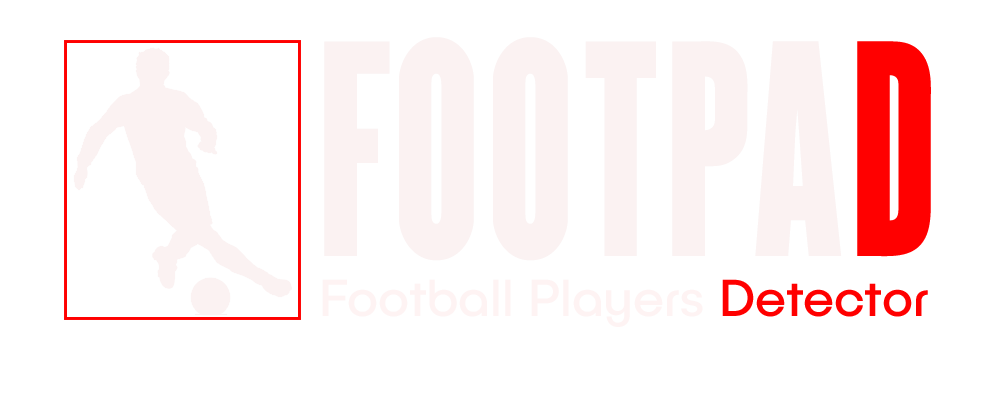

# **FOOTPAD**
```
Nome: Lorenzo 
Cognome: Ralli
Mat: 1853661
``` 


Mount di Google Drive in cui va inserito dataset per classificazione Keras, file di configurazione di YOLO, il video su cui si vuole effettuare la Detection e l'immagine Plane del campo su cui si vuole effettuare la Perspective Transform

In [1]:
from google.colab import drive

print("mounting DRIVE...")
drive.mount('/content/gdrive', force_remount=True)

mounting DRIVE...
Mounted at /content/gdrive


Import delle librerie comuni tra le varie sezioni

In [2]:
import cv2
import numpy as np
from numpy import argmax
import tensorflow as tf
from tensorflow import keras

## **KERAS MODEL TRAINING**

Installazione di Tensorflow e import delle librerie necessarie tra cui cv2, numpy, matplotlib e Keras

In [ ]:
!pip install tensorflow==2.1.0
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcudnn8 is already the newest version (8.1.0.77-1+cuda11.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


Import delle librerie necessarie

In [3]:
import os
import matplotlib.pyplot as plt
from keras import layers
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical

Preparazione del batch in cui inserire le immagini da passare al network

In [4]:
#Inizializzazione array a 0 con shape = 183 immagini di dimensione 96x96 e 3 canali
x=np.zeros((183,96,96,3),dtype=np.float32)
#Inizializzazione array a 0 con shape = 183 immagini (righe) e 1 colonna 
ye=np.zeros((183,1),dtype=np.float32)

Caricamento e pre-processamento del set di immagini

In [5]:
p=0
for filename in os.listdir('/content/gdrive/MyDrive/IAGI_Project/KERAS/players'):
    for player in os.listdir('/content/gdrive/MyDrive/IAGI_Project/KERAS/players'+'/'+filename):
        img=cv2.imread('/content/gdrive/MyDrive/IAGI_Project/KERAS/players'+'/'+filename+'/'+player)
        x[p]=cv2.resize(img,(96,96))
        ye[p]=int(filename)
        p=p+1
y = to_categorical(ye)
print(y)   

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0.

Normalizzazione batch immagini e shuffle

In [6]:
x=x/255.0

In [7]:
v, u = shuffle(x, y)

Creazione rete neurale Keras

In [8]:
#Input Layer (image shape, numero canali)
Input_Layer = layers.Input((96,96,3)) 

#(num neurons, 
# kernel size = dimensione immagini da cui estrarre le features,  
# activation function)


l1= layers.Conv2D(32, kernel_size=(3,3), activation='relu')(Input_Layer)
l2= layers.MaxPool2D((2,2))(l1)

l3= layers.Conv2D(16,(3,3),activation='relu')(l2)
l4= layers.MaxPool2D((2,2))(l3)

l5= layers.Conv2D(8,(3,3),activation='relu')(l4)
l6= layers.MaxPool2D((2,2))(l5)

l7= layers.Conv2D(2,(3,3),activation='relu')(l6)

#Per mettere tutte le informazioni ottenute sulla stessa riga
l8= layers.Flatten()(l7)

#Per compattare le informazioni
l9= layers.Dense(256,activation='relu')(l8)

#Per rimozione rumore
l10= layers.Dropout(0.5)(l9)

l11= layers.Dense(3,activation='sigmoid')(l10)

model=keras.Model(inputs=Input_Layer,outputs=l11)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 8)         1160  

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [ ]:
model.fit(v,u,6,500)

Epoch 1/500
31/31 [==============================] - 13s 12ms/step - loss: 0.6035 - accuracy: 0.4754
Epoch 2/500
31/31 [==============================] - 0s 6ms/step - loss: 0.3841 - accuracy: 0.7432
Epoch 3/500
31/31 [==============================] - 0s 6ms/step - loss: 0.2460 - accuracy: 0.8306
Epoch 4/500
31/31 [==============================] - 0s 5ms/step - loss: 0.1769 - accuracy: 0.9180
Epoch 5/500
31/31 [==============================] - 0s 6ms/step - loss: 0.1492 - accuracy: 0.9344
Epoch 6/500
31/31 [==============================] - 0s 6ms/step - loss: 0.0951 - accuracy: 0.9617
Epoch 7/500
31/31 [==============================] - 0s 6ms/step - loss: 0.0834 - accuracy: 0.9617
Epoch 8/500
31/31 [==============================] - 0s 6ms/step - loss: 0.0515 - accuracy: 0.9781
Epoch 9/500
31/31 [==============================] - 0s 6ms/step - loss: 0.0656 - accuracy: 0.9727
Epoch 10/500
31/31 [==============================] - 0s 6ms/step - loss: 0.0462 - accuracy: 0.9836
Epoch 1

Test modello Keras e salvataggio

1
1


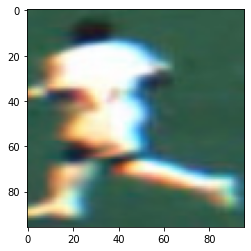

In [ ]:
o=90
yu=model.predict(np.reshape(v[o],(1,96,96,3)))
plt.imshow(v[o])
print(argmax(yu))
print(argmax(u[o]))

In [ ]:
model.save('model2.h5')

## **YOLO WEIGHTS TRAINING**

Set-up di Darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet
%cd darknet

OPENCV = True #@param {type:"boolean"}
GPU = True #@param {type:"boolean"}
CUDNN = True #@param {type:"boolean"}
CUDNN_HALF = True #@param {type:"boolean"}

print("setting properties...")
if OPENCV:
  print("activating OPENCV...")
  !sed -i 's/OPENCV=0/OPENCV=1/' Makefile

if GPU:
  print("engines CUDA...")
  !/usr/local/cuda/bin/nvcc --version
  
  print("activating GPU...")
  !sed -i 's/GPU=0/GPU=1/' Makefile

if CUDNN:
  print("activating CUDNN...")
  !sed -i 's/CUDNN=0/CUDNN=1/' Makefile

if CUDNN_HALF:
  print("activating CUDNN_HALF...")
  !sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

print("making...")
!make

print("FINISH!")

Cloning into 'darknet'...
remote: Enumerating objects: 15490, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 15490 (delta 10), reused 18 (delta 8), pack-reused 15460
Receiving objects: 100% (15490/15490), 14.08 MiB | 21.85 MiB/s, done.
Resolving deltas: 100% (10398/10398), done.
/content/darknet
setting properties...
activating OPENCV...
engines CUDA...
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
activating GPU...
activating CUDNN...
activating CUDNN_HALF...
making...
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragm

Loading cartella Dataset

In [ ]:
print("loading dataset...")
!cp /content/gdrive/MyDrive/IAGI_Project/YOLO/Dataset/Frames/obj.zip ../

print("unziping dataset...")
!unzip ../obj.zip -d data

loading dataset...
unziping dataset...
Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/100.jpg        
  inflating: data/obj/100.txt        
  inflating: data/obj/1000.jpg       
  inflating: data/obj/1000.txt       
  inflating: data/obj/1025.jpg       
  inflating: data/obj/1025.txt       
  inflating: data/obj/1050.jpg       
  inflating: data/obj/1050.txt       
  inflating: data/obj/1075.jpg       
  inflating: data/obj/1075.txt       
  inflating: data/obj/1100.jpg       
  inflating: data/obj/1100.txt       
  inflating: data/obj/1125.jpg       
  inflating: data/obj/1125.txt       
  inflating: data/obj/1150.jpg       
  inflating: data/obj/1150.txt       
  inflating: data/obj/1175.jpg       
  inflating: data/obj/1175.txt       
  inflating: data/obj/1200.jpg       
  inflating: data/obj/1200.txt       
  inflating: data/obj/1225.jpg       
  inflating: data/obj/1225.txt       
  inflating: data/obj/125.jpg        
  inflating: data/obj/125.txt        
  inf

Loading file di configurazione di YOLO

In [ ]:
print("loading yolo-obj.cfg...")
!cp /content/gdrive/MyDrive/IAGI_Project/YOLO/configuration_files/yolo-obj.cfg ./cfg

print("loading obj.names...")
!cp /content/gdrive/MyDrive/IAGI_Project/YOLO/configuration_files/obj.names ./data

print("loading obj.data...")
!cp /content/gdrive/MyDrive/IAGI_Project/YOLO/configuration_files/obj.data ./data

print("loading train.txt...")
!cp /content/gdrive/MyDrive/IAGI_Project/YOLO/configuration_files/train.txt ./data

loading yolo-obj.cfg...
loading obj.names...
loading obj.data...
loading train.txt...


Loading Pre-Trained Weights

In [ ]:
print("loading pre_trained weights...")
!cp /content/gdrive/MyDrive/IAGI_Project/YOLO/configuration_files/yolov4.conv.137 ./
!pwd

loading pre_trained weights...
/content/darknet


TRAINING

In [ ]:

train_using_mAP = True #@param {type:"boolean"}

option = 'RESUME TRAINING' #@param ["START TRAINING FROM BEGINNING", "RESUME TRAINING"]

if option == 'START TRAINING FROM BEGINNING':
  if train_using_mAP:
    !./darknet detector train data/obj.data cfg/yolo-obj.cfg yolov4.conv.137 -dont_show -map
  else:
    !./darknet detector train data/obj.data cfg/yolo-obj.cfg yolov4.conv.137 -dont_show
else:
  if train_using_mAP:
    !./darknet detector train data/obj.data cfg/yolo-obj.cfg /content/gdrive/MyDrive/IAGI_Project/YOLO/configuration_files/yolo-obj_last.weights -dont_show -map
  else:
    !./darknet detector train data/obj.data cfg/yolo-obj.cfg /content/gdrive/MyDrive/IAGI_Project/YOLO/configuration_files/yolo-obj_last.weights -dont_show

Output streaming troncato alle ultime 5000 righe.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.845622), count: 5, class_loss = 0.037101, iou_loss = 3.130757, total_loss = 3.167858 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 1298226, rewritten_bbox = 0.133259 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.831584), count: 141, class_loss = 2.345305, iou_loss = 441.694824, total_loss = 444.040131 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.852809), count: 17, class_loss = 0.252737, iou_loss = 27.191854, total_loss = 27.444592 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 1298384, rewritten_bbox = 0.13

Test weights generate

In [ ]:
! ./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolo-obj.cfg /content/gdrive/MyDrive/IAGI_Project/YOLO/configuration_files/yolo-obj_best.weights /content/darknet/data/obj/100.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

## **MULTIPLE OBJECT DETECTION & PERSPECTIVE TRANSFORMATION**

**Get_Matrix**.py

Script a cui passare in input un frame del video su cui si vuole effettuare la Perspective Transformation e l'immagine plane del campo da gioco, restituisce la matrice di Perspective Transformation da usare in Main_Script.py

In [ ]:
#Immagine del campo da gioco come visto nel video
CampoVideo = cv2.imread('/content/gdrive/MyDrive/IAGI_Project/DETECTION/Get_Matrix/src.jpg')
#Immagine del campo da gioco in bird view scelta
CampoPlane = cv2.imread('/content/gdrive/MyDrive/IAGI_Project/DETECTION/Get_Matrix/dst1.jpg') 

CampoVideoShape = CampoVideo.shape
#print("Dimensioni campo video: ", CampoVideoShape)
CampoPlaneShape = CampoPlane.shape
#print("Dimensioni campo bird view: ", CampoPlaneShape)

#Test per trovare punti su mappa bird view
#cv2.circle(CampoPlane, (548,45), 5, (0,0,255), -1)
#cv2.circle(CampoPlane, (460,368), 5, (0,0,255), -1)
#cv2.circle(CampoPlane, (633,368), 5, (0,0,255), -1)
#cv2.circle(CampoPlane, (548,693), 5, (0,0,255), -1)

#imgS = cv2.resize(CampoPlane, None, fx=0.9, fy=0.9)
#cv2.imshow('Test', imgS)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#Test per trovare punti su frame video
#cv2.circle(CampoVideo, (940,96), 10, (0,0,255), -1)
#cv2.circle(CampoVideo, (1427,395), 10, (0,0,255), -1)
#cv2.circle(CampoVideo, (455,395), 10, (0,0,255), -1)
#cv2.circle(CampoVideo, (943,1022), 10, (0,0,255), -1)

#imgS = cv2.resize(CampoVideo, None, fx=0.8, fy=0.8)
#cv2.imshow('Test',imgS)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#(top, right, left, bottom)
pts1 = np.float32([[940,96],[1427,395],[455,395],[943,1022]])
#print(pts1)
pts2 = np.float32([[548,45],[633,368],[460,368],[548,693]])   
#print(pts2)
pts3 = np.float32([[943,395]]) #Per test su punto centrale
#print(pts3)

M = cv2.getPerspectiveTransform(pts1,pts2)
print(M)

#Test Funzionamento Matrice
#pts3o = cv2.perspectiveTransform(pts3[None, :, :],M)
#print(pts3o)

#x = int(pts3o[0][0][0]) # = ascissa punto centrale
#y = int(pts3o[0][0][1]) # = ordinata punto centrale
#p = (x,y)

#cv2.circle(CampoPlane, p, 5, (0,0,255),-1)

#cv2.imshow('Test',CampoPlane)

#cv2.waitKey(0)

#cv2.destroyAllWindows()

[[ 3.16690465e-01  7.60754322e-01  2.79973193e+02]
 [ 2.11272233e-02  1.79420066e+00 -1.38669899e+02]
 [ 5.74109329e-05  1.38992407e-03  1.00000000e+00]]


Algoritmo di Detection

1. Fase di Set-Up

In [ ]:
from tensorflow.keras.models import load_model

############################# Set-up ########################################

#Carica model Keras allenato
KerasModel = load_model(r'/content/gdrive/MyDrive/IAGI_Project/DETECTION/files/model.h5')

#Leggi il file video di input
cap = cv2.VideoCapture(r'/content/gdrive/MyDrive/IAGI_Project/DETECTION/data/video.avi')

#controlla se il file video di input è stato aperto correttamente
if (cap.isOpened()== False): 
    print("Errore nell'apertura del file video")

temp   = cv2.imread(r'/content/gdrive/MyDrive/IAGI_Project/DETECTION/data/temp.jpg',0)
bird   = cv2.imread(r'/content/gdrive/MyDrive/IAGI_Project/DETECTION/data/dst1.jpg')

#Salva dimensioni palla
wt, ht = temp.shape[::-1]

#Prendi dimensioni video input che vanno prima convertite da float a int
frame_width  = int(cap.get(3))
frame_height = int(cap.get(4))
size = (frame_width, frame_height)

#Salva il video in game con le stesse dimensioni del video in input e il birdview in bird con le stesse
#dimensioni dell'immagine su cui si vuole mappare il movimento dei giocatori
game      = cv2.VideoWriter('/content/game.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 20, (1920,1080))
birdview  = cv2.VideoWriter('/content/bird.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 20, (1100, 746))

##############################################################################

2. Fase di Load Yolo

In [ ]:
############################# Load Yolo ########################################

#Carica Network con pre-trained weights e configuration file di Yolo
net = cv2.dnn.readNet("/content/gdrive/MyDrive/IAGI_Project/YOLO/configuration_files/yolo-obj_best.weights", 
                      "/content/gdrive/MyDrive/IAGI_Project/YOLO/configuration_files/yolo-obj.cfg")

#Carica le classi dal file classes
classes = []
with open("/content/gdrive/MyDrive/IAGI_Project/YOLO/configuration_files/obj.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
    print(classes)

#Set-up layers
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

#Colora layers in modo diverso per ogni classe
colors = np.random.uniform(0, 255, size=(len(classes), 3)) 

################################################################################

['Giocatore', 'Arbitro', 'Palla', 'Guardalinee']


3. Funzione Get Detections

In [ ]:
############################# Get Detected #####################################

def get_detected(outs,height, width):

    class_ids = []
    confidences = []
    boxes = []
    detected = []
    info = []

    for out in outs:
        for detection in out:
            #Prendiamo la confidence
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)   # Coordinata x centro oggetto 
                center_y = int(detection[1] * height)  # Coordinata y centro oggetto
                w = int(detection[2] * width)          # Larghezza oggetto trovato
                h = int(detection[3] * height)         # Altezza oggetto trovato
                # Coordinate angolo alto sinistro Rettangolo
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                
                info.append([x, y, w, h, class_id])
                boxes.append([x, y, w, h])            # coordinate oggetto trovato
                confidences.append(float(confidence)) # confidence oggetto trovato
                class_ids.append(class_id)            # nome oggetto trovato
                
    # Funzione NoMaxSuppression per ridurre rumore
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    #Ciclo su tutte le detection per aggiungere a i-esimo detected le sue informazioni contenute in boxes
    for i in range(len(boxes)):
        #tengo conto della NoMaxSuppression per evitare che un oggetto compaia 2 volte
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            if label!='Palla':
                detected.append(info[i])
            
    return detected

################################################################################

4. Funzione Plane per Perspective Transformation

In [ ]:
############################# Bird View ########################################

def plane(players,ball):
    planetemp = bird.copy()
    #Inserisco la matrice calcolata con Get_Matrix.py
    matrix=np.array([[ 3.16690465e-01,  7.60754322e-01,  2.79973193e+02],
                     [ 2.11272233e-02,  1.79420066e+00, -1.38669899e+02],
                     [ 5.74109329e-05,  1.38992407e-03,  1.00000000e+00]])

    for p in players:
        x = p[0] + int(p[2]/2) 
        y = p[1] + p[3]
        ptsGiocatore = np.float32([[x,y]])
        ptsGiocatoreo = cv2.perspectiveTransform(ptsGiocatore[None, :, :],matrix)
        x1=int(ptsGiocatoreo[0][0][0]) # = ascissa punto centrale
        y1=int(ptsGiocatoreo[0][0][1]) # = ordinata punto centrale
        pp = (x1,y1)
        if(p[5]==0):
            cv2.circle(planetemp, pp, 15, (255,0,0),-1)
        elif p[5]==1:
            cv2.circle(planetemp, pp, 15, (255,255,255),-1)
        elif p[5]==2:
            cv2.circle(planetemp, pp, 15, (0,0,255),-1)
    if len(ball) !=0:
        
        xb = ball[0] + int(ball[2]/2)
        yb = ball[1] + int(ball[3]/2)
        ptsball = np.float32([[xb,yb]])
        ptsballo = cv2.perspectiveTransform(ptsball[None, :, :],matrix)
        x2 = int(ptsballo[0][0][0]) # = ascissa punto centrale
        y2 = int(ptsballo[0][0][1]) # = ordinata punto centrale
        pb = (x2,y2)
        cv2.circle(planetemp, pb, 15, (0,0,0),-1)
    return planetemp

################################################################################

5. Main Phase

In [ ]:
############################# Main Phase #######################################

opr=0
frameN = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    
    players=[]
    ball=[]
    if opr<310:
        opr=opr+1
        continue
    
    if ret == True :
        
        frameN += 1
        copy = frame.copy()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        #Calcolo dimensioni frame
        height, width, channels = frame.shape
        
        #Estrazione features tramite blob
        blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

        #Test funzionamento blob con display dei 3 canali
        #for b in blob:
        #for n, img_blob in enumerate(b):
        #cv2.imshow(str(b), img_blob)

        #Blob processato dall'algoritmo YOLO
        net.setInput(blob)
        outs = net.forward(output_layers)
        outs = get_detected(outs, height, width)
        print(outs)
        for i in range(len(outs)):
            x, y, w, h, class_id = outs[i]
            Clabel = str(classes[class_id])
            print(Clabel)
            roi = frame[y:y+h,x:x+w]
            
            #Alcuni frame potrebbero non andare bene per la classification quindi la funzione può lanciare errori
            try:
                roi = cv2.resize(roi, (96,96))
            except:
                continue
            ym = KerasModel.predict(np.reshape(roi,(1,96,96,3)))
            ym = argmax(ym)
            
            players.append([x,y,w,h,Clabel,ym])
            
            if ym==0:
                cv2.rectangle(copy, (x, y), (x + w, y + h), (0,0,255), 2)  #Disegno rettangolo con coordinate angolo alto sx e basso dx
            elif ym==1:
                cv2.rectangle(copy, (x, y), (x + w, y + h), (0,255,0), 2)
            elif ym==2:
              if Clabel=="Arbitro":
                cv2.rectangle(copy, (x, y), (x + w, y + h), (255,0,0), 2)
              elif Clabel=="Guardalinee":
                cv2.rectangle(copy, (x, y), (x + w, y + h), (255,255,0), 2)
            
        
        res = cv2.matchTemplate(gray,temp,cv2.TM_SQDIFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        if min_val < 0.05:
            top_left = min_loc
            bottom_right = (top_left[0] + wt, top_left[1] + ht)
            ball.append(top_left[0])
            ball.append(top_left[1])
            ball.append(wt)
            ball.append(ht)
            cv2.rectangle(copy,top_left, bottom_right, (0,255,100), 2)
            
        p=plane(players, ball)
            
        game.write(copy)
        birdview.write(p)
        
        print("Frame", frameN, ": Detection Completata!")
        
    if cv2.waitKey(1)==27:
        break

#Release della clip di input e output
cap.release()
game.release()
birdview.release()

################################################################################

[[360, 13, 40, 77, 3], [1169, 20, 49, 93, 0], [847, 74, 46, 87, 0], [1009, 147, 42, 95, 0], [762, 165, 43, 107, 0], [258, 199, 42, 88, 0], [1402, 176, 53, 122, 0], [741, 235, 48, 100, 0], [254, 270, 48, 113, 0], [303, 263, 40, 122, 0], [1802, 291, 59, 114, 0], [1543, 331, 56, 120, 0], [249, 402, 47, 95, 0], [710, 400, 53, 103, 1], [901, 382, 50, 114, 0], [262, 447, 53, 130, 0], [382, 512, 56, 119, 0], [1889, 576, 31, 159, 0]]
Guardalinee
Giocatore
Giocatore
Giocatore
Giocatore
Giocatore
Giocatore
Giocatore
Giocatore
Giocatore
Giocatore
Giocatore
Giocatore
Arbitro
Giocatore
Giocatore
Giocatore
Giocatore
Frame 1 : Detection Completata!
[[360, 14, 40, 76, 3], [1166, 20, 48, 92, 0], [847, 73, 47, 90, 0], [1004, 144, 44, 102, 0], [758, 166, 45, 104, 0], [258, 194, 40, 93, 0], [1400, 178, 49, 116, 0], [737, 232, 50, 99, 0], [251, 270, 45, 114, 0], [299, 262, 42, 122, 0], [1798, 291, 55, 114, 0], [1540, 328, 54, 123, 0], [247, 401, 48, 96, 0], [705, 397, 51, 108, 1], [893, 373, 51, 133, 0], [

KeyboardInterrupt: ignored